In [1]:
path = '/Users/jaeyeobjeong/Desktop/포트폴리오/프로젝트/소비예측 경진대회/data'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
pd.set_option('mode.chained_assignment',  None)

In [3]:
train = pd.read_csv(f'{path}/train.csv')
test = pd.read_csv(f'{path}/test.csv')

## Feature Describes

- Year_Birth : 고객 생년월일
- Education : 고객 학력
- Marital_status : 고객 결혼 상태
- Income : 고객 연간 가구 소득
- Kidhome : 고객 가구의 자녀 수
- Teenhome : 고객 가구의 청소년 수
- Dt_Customer : 고객이 회사에 등록한 날짜
- Recency : 고객의 마지막 구매 이후 일수
- NumDealsPurchases : 할인된 구매 횟수
- NumWebPurchases : 회사 웹사이트를 통한 구매 건수
- NumCatalogPurchases : 카탈로그를 사용한 구매 수 
- NumStorePuchases : 매장에서 직접 구매한 횟수
- NumWebVisitsMonth : 지난 달 회사 웹사이트 방문 횟수
- AcceptedCmp1: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp2: 고객이 두 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp3: 고객이 세 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp4: 고객이 네 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp5: 고객이 5번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- Complain : 고객이 지난 2년 동안 불만을 제기한 경우 1, 그렇지 않은 경우 0
- Response : 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- target : 고객의 제품 총 소비량

In [4]:
train.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444


In [5]:
train.shape, test.shape

((1108, 22), (1108, 21))

변수의 개수가 매우 적은 것을 알 수 있음.

## 기본 변수 생성

- 날짜/요일 관련

In [6]:
train['Dt_Customer'] = pd.to_datetime(train['Dt_Customer'], dayfirst=True)

train['register_year'] = train['Dt_Customer'].dt.year
# train['register_month'] = train['Dt_Customer'].dt.month
# train['register_day'] = train['Dt_Customer'].dt.day
# train['register_weekday'] = train['Dt_Customer'].dt.dayofweek

test['Dt_Customer'] = pd.to_datetime(test['Dt_Customer'], dayfirst=True)

test['register_year'] = test['Dt_Customer'].dt.year
# test['register_month'] = test['Dt_Customer'].dt.month
# test['register_day'] = test['Dt_Customer'].dt.day
# test['register_weekday'] = test['Dt_Customer'].dt.dayofweek

In [7]:
train['register_age'] = train['register_year'] - train['Year_Birth']
test['register_age'] = test['register_year'] - test['Year_Birth']

In [8]:
train['customer_terms'] = (pd.to_datetime('2022-05-01') - train['Dt_Customer']).astype(str).str.split() \
.apply(lambda x : x[0]).astype(int)

test['customer_terms'] = (pd.to_datetime('2022-05-01') - test['Dt_Customer']).astype(str).str.split() \
.apply(lambda x : x[0]).astype(int)

In [9]:
train['shopping_interval'] = train['customer_terms'] - train['Recency']
test['shopping_interval'] = test['customer_terms'] - test['Recency']

## 변수 살펴보기

### 범주형 변수

In [10]:
train['Sum_AcceptedCmp'] = train[['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis = 1)
test['Sum_AcceptedCmp'] = test[['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis = 1)

In [11]:
cat_features =['Education','Marital_Status', 'Kidhome', 'Teenhome', 
               'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Sum_AcceptedCmp',
               'Complain', 'Response']

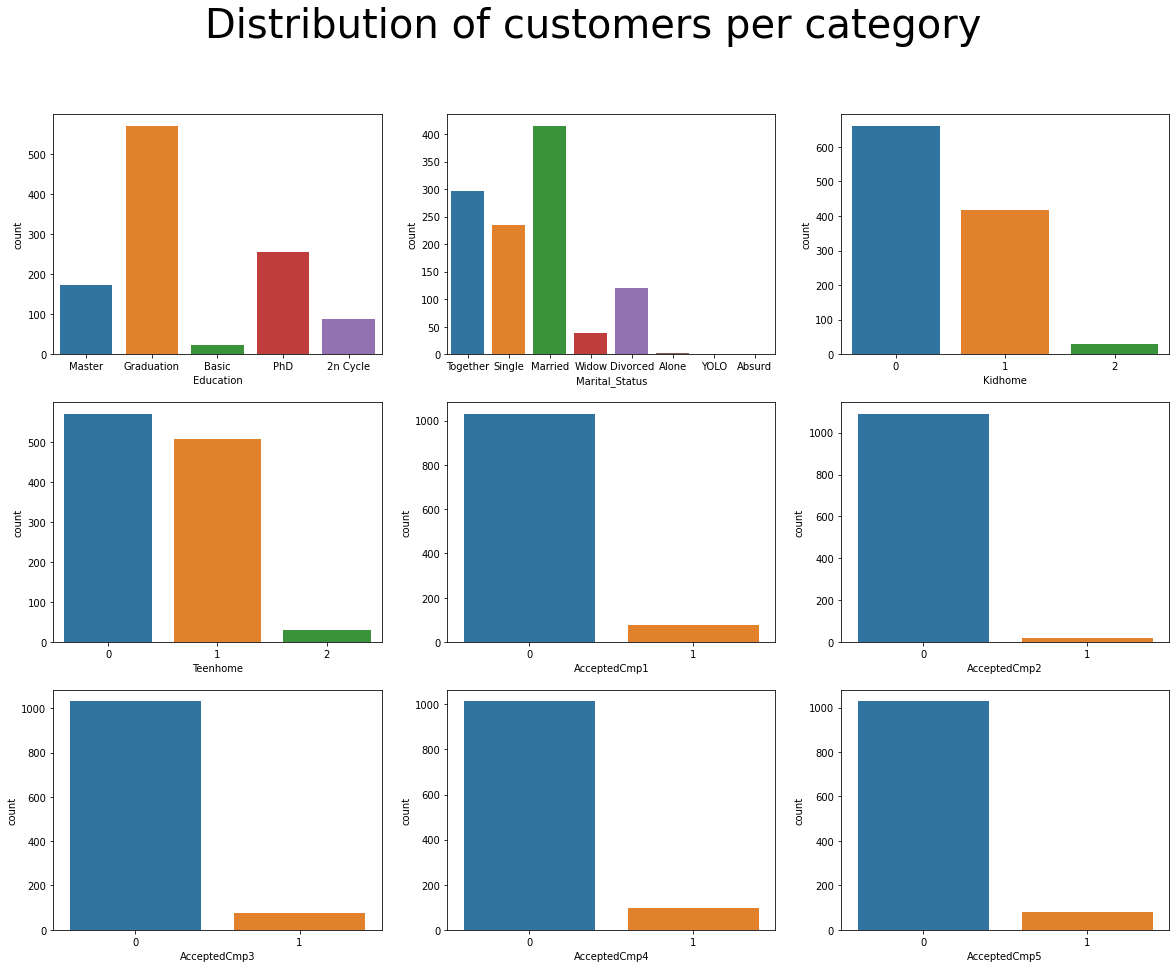

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(20,15))
fig.suptitle('Distribution of customers per category', fontsize=40)

for ax, feature in zip(axes.flatten(), cat_features):
    sns.countplot(data = train, x = feature, ax=ax)
plt.show()

In [13]:
for feat in cat_features:
    print(train.groupby(feat)['target'].agg(np.mean).sort_values())
    print(train.groupby(feat)['target'].agg('count').sort_values())
    print()

Education
Basic          66.500000
2n Cycle      539.494382
Graduation    598.254386
Master        672.878613
PhD           696.377953
Name: target, dtype: float64
Education
Basic          22
2n Cycle       89
Master        173
PhD           254
Graduation    570
Name: target, dtype: int64

Marital_Status
Alone         69.000000
YOLO         424.000000
Together     594.935811
Married      606.392771
Single       628.495726
Divorced     658.508333
Widow        721.794872
Absurd      1216.000000
Name: target, dtype: float64
Marital_Status
Absurd        1
YOLO          1
Alone         2
Widow        39
Divorced    120
Single      234
Together    296
Married     415
Name: target, dtype: int64

Kidhome
2    141.344828
1    213.624402
0    893.157337
Name: target, dtype: float64
Kidhome
2     29
1    418
0    661
Name: target, dtype: int64

Teenhome
1    532.986193
2    657.166667
0    689.723292
Name: target, dtype: float64
Teenhome
2     30
1    507
0    571
Name: target, dtype: int64

Acc

In [14]:
train['Marital_Status'].value_counts()

Married     415
Together    296
Single      234
Divorced    120
Widow        39
Alone         2
YOLO          1
Absurd        1
Name: Marital_Status, dtype: int64

In [15]:
test['Marital_Status'].value_counts()

Married     442
Together    277
Single      237
Divorced    112
Widow        37
Absurd        1
Alone         1
YOLO          1
Name: Marital_Status, dtype: int64

In [16]:
train.groupby('Marital_Status')['Kidhome'].agg(np.mean)

Marital_Status
Absurd      0.000000
Alone       1.000000
Divorced    0.375000
Married     0.440964
Single      0.435897
Together    0.462838
Widow       0.179487
YOLO        0.000000
Name: Kidhome, dtype: float64

In [17]:
train['diff_kid_teen'] = (train['Kidhome'] - train['Teenhome'])
test['diff_kid_teen'] = (test['Kidhome'] - test['Teenhome'])

### 연속형 변수 

In [18]:
train['NumPurchases'] = train[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis = 1)
test['NumPurchases'] = test[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis = 1)

In [19]:
num_features = ['Income', 'Recency', 
       #'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'NumPurchases',
       'register_age', 'customer_terms', 'shopping_interval'
]

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

num_features.extend(['Kidhome', 'Teenhome', 'diff_kid_teen', 'Sum_AcceptedCmp',])

if 'target' in num_features:
    num_features.remove('target')
vif_num_features = pd.DataFrame()
vif_num_features['train_vif_score'] = [variance_inflation_factor(train[num_features].values, i) for i in range(train[num_features].shape[1])]
vif_num_features['test_vif_score'] = [variance_inflation_factor(test[num_features].values, i) for i in range(test[num_features].shape[1])]
vif_num_features['feature'] = num_features

/Users/jaeyeobjeong/.pyenv/versions/3.9.9/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/jaeyeobjeong/.pyenv/versions/3.9.9/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/jaeyeobjeong/.pyenv/versions/3.9.9/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/jaeyeobjeong/.pyenv/versions/3.9.9/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/jaeyeobjeong/.pyenv/versions/3.9.9/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_

In [21]:
vif_num_features.sort_values(by = 'train_vif_score')

,train_vif_score,test_vif_score,feature
10,1.550261,1.474719,Sum_AcceptedCmp
3,10.368395,8.302012,NumPurchases
2,13.098234,10.449643,NumWebVisitsMonth
4,15.937644,17.014682,register_age
0,23.208291,7.139802,Income
1,inf,inf,Recency
5,inf,inf,customer_terms
6,inf,inf,shopping_interval
7,inf,inf,Kidhome
8,inf,inf,Teenhome


In [23]:
train[num_features].corr()

,Income,Recency,NumWebVisitsMonth,NumPurchases,register_age,customer_terms,shopping_interval,Kidhome,Teenhome,diff_kid_teen,Sum_AcceptedCmp
Income,1.000000,0.019414,-0.649677,0.735913,0.215607,-0.006911,-0.009734,-0.491682,0.056695,-0.374661,0.356091
Recency,0.019414,1.000000,-0.015293,0.030913,-0.003148,0.050160,-0.096628,0.021386,0.017762,0.002339,-0.063831
NumWebVisitsMonth,-0.649677,-0.015293,1.000000,-0.424473,-0.106384,0.243909,0.245315,0.415928,0.129008,0.194830,-0.115843
NumPurchases,0.735913,0.030913,-0.424473,1.000000,0.178557,0.183610,0.178449,-0.556640,0.055446,-0.418129,0.293168
register_age,0.215607,-0.003148,-0.106384,0.178557,1.000000,-0.061460,-0.060787,-0.245685,0.340295,-0.402467,0.040329
customer_terms,-0.006911,0.050160,0.243909,0.183610,-0.061460,1.000000,0.989221,-0.086705,0.026746,-0.077625,0.080152
shopping_interval,-0.009734,-0.096628,0.245315,0.178449,-0.060787,0.989221,1.000000,-0.089543,0.024050,-0.077702,0.089236
Kidhome,-0.491682,0.021386,0.415928,-0.556640,-0.245685,-0.086705,-0.089543,1.000000,-0.061787,0.725069,-0.190248
Teenhome,0.056695,0.017762,0.129008,0.055446,0.340295,0.026746,0.024050,-0.061787,1.000000,-0.732160,-0.125658
diff_kid_teen,-0.374661,0.002339,0.194830,-0.418129,-0.402467,-0.077625,-0.077702,0.725069,-0.732160,1.000000,-0.043129


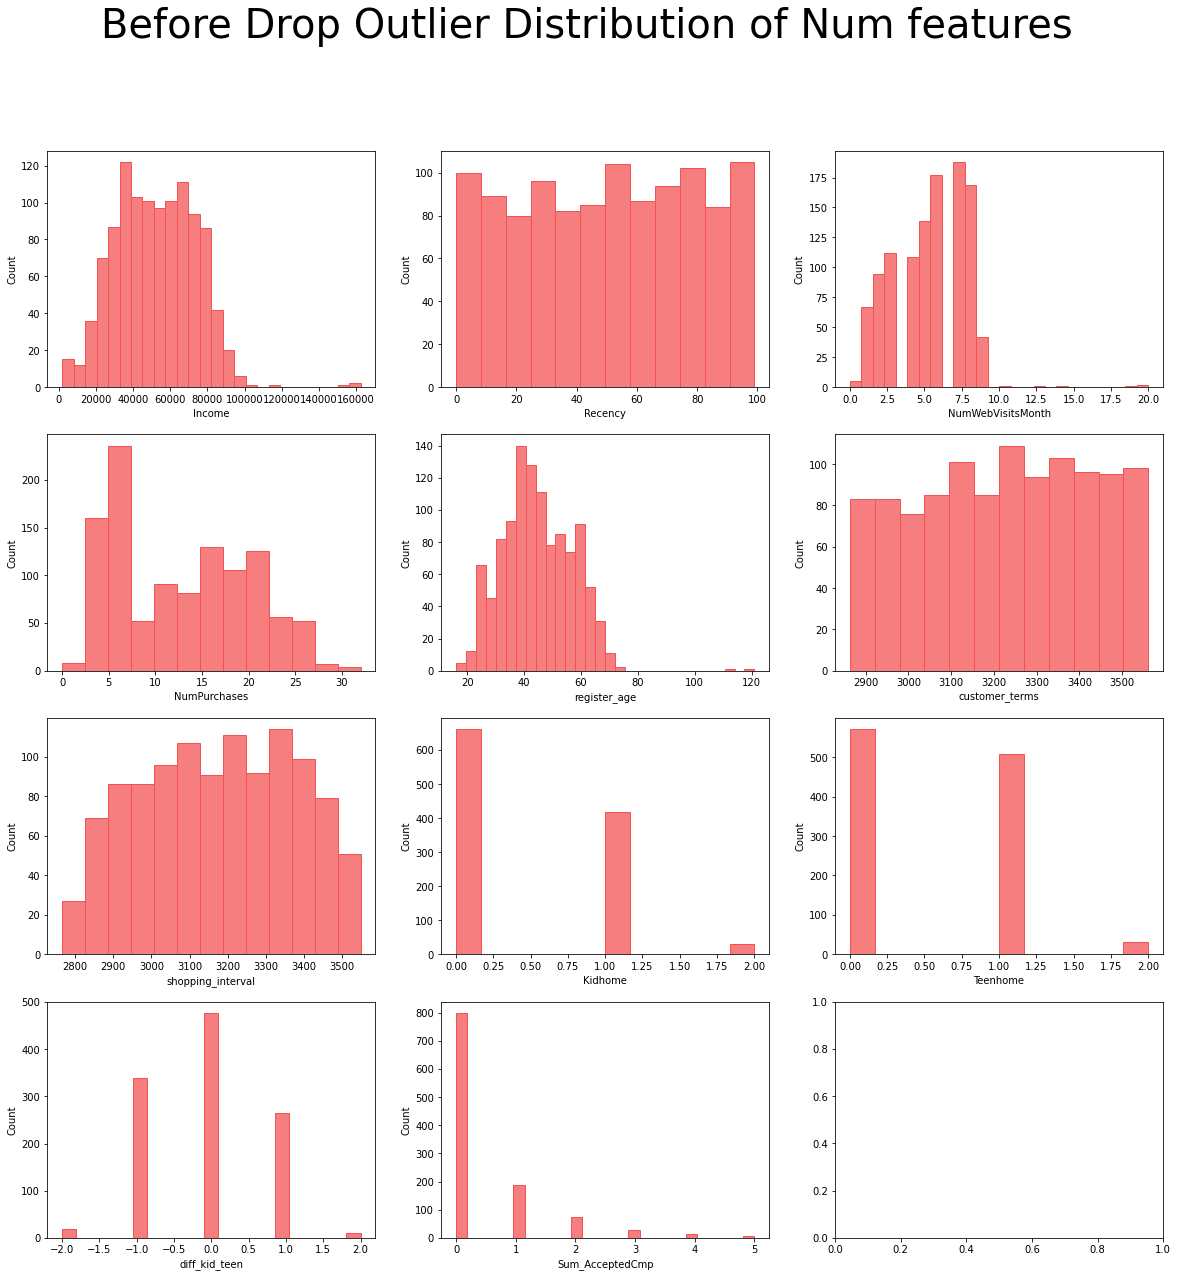

In [24]:
fig, axes = plt.subplots(4, 3, figsize=(20,20))
fig.suptitle('Before Drop Outlier Distribution of Num features', fontsize=40)
#plt.tight_layout()

for ax,feature in zip(axes.flatten(),num_features):
    sns.histplot(data = train, x = feature, ax=ax, color='#f55354', edgecolor='#f15354')
plt.show()

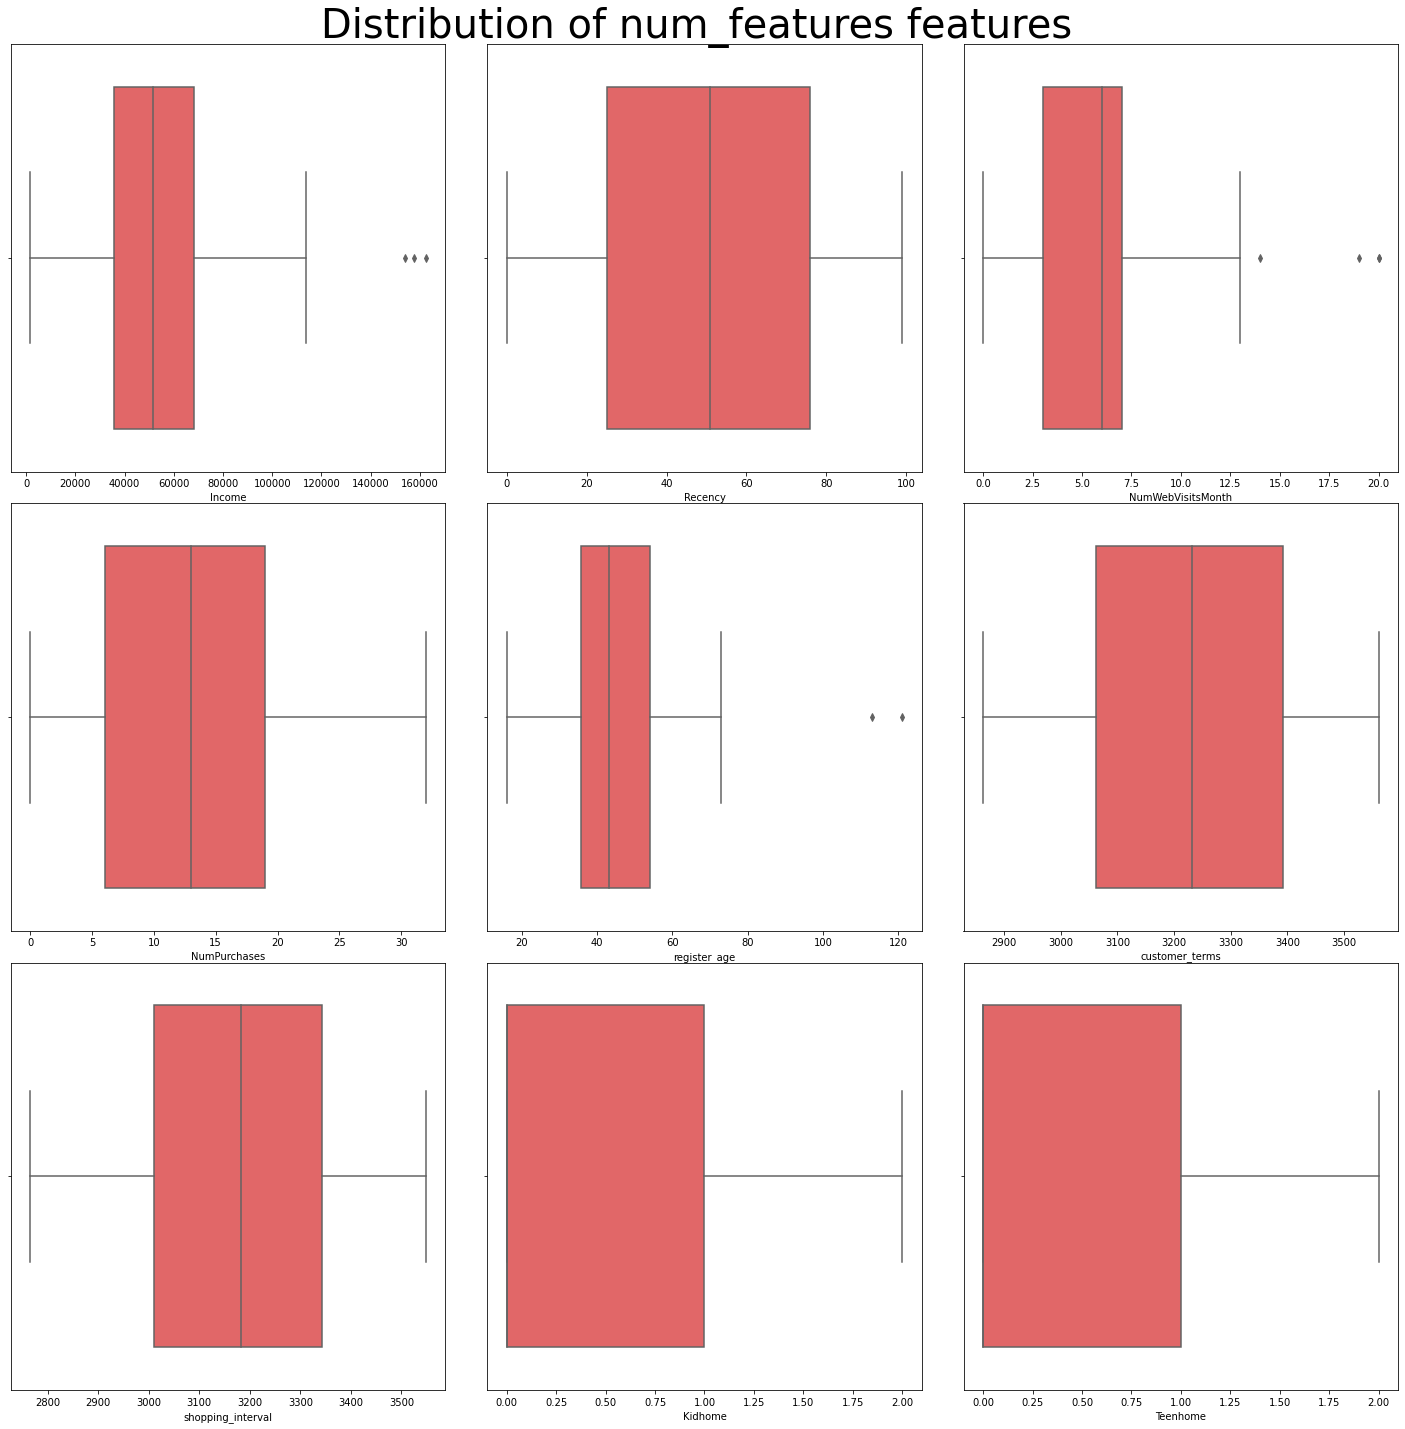

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))
fig.suptitle('Distribution of num_features features', fontsize=40)
plt.tight_layout()

for ax,feature in zip(axes.flatten(),num_features):
    sns.boxplot(data = train, x = feature, ax=ax, color='#f55354')
plt.show()

In [26]:
from scipy import stats
def IQR(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -(1.5 * IQR)
    upper_bound = Q3 +(1.5 * IQR)
    if 

outliers = train[num_features].apply(lambda column: IQR(column))
print('Range of outliers by method')
outliers

SyntaxError: invalid syntax (1455920036.py, line 8)

In [27]:
def IQRsum(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -(1.5 * IQR)
    upper_bound = Q3 +(1.5 * IQR)
    return ((column < lower_bound) | (column > upper_bound)).sum()

outliers = train[num_features].apply(lambda column: IQRsum(column))
print('Number of outliers by method')
outliers

Number of outliers by method


Income                3
Recency               0
NumWebVisitsMonth     4
NumPurchases          0
register_age          2
customer_terms        0
shopping_interval     0
Kidhome               0
Teenhome              0
diff_kid_teen        10
Sum_AcceptedCmp      47
dtype: int64

Text(0.5, 1.0, 'Correlation between features')

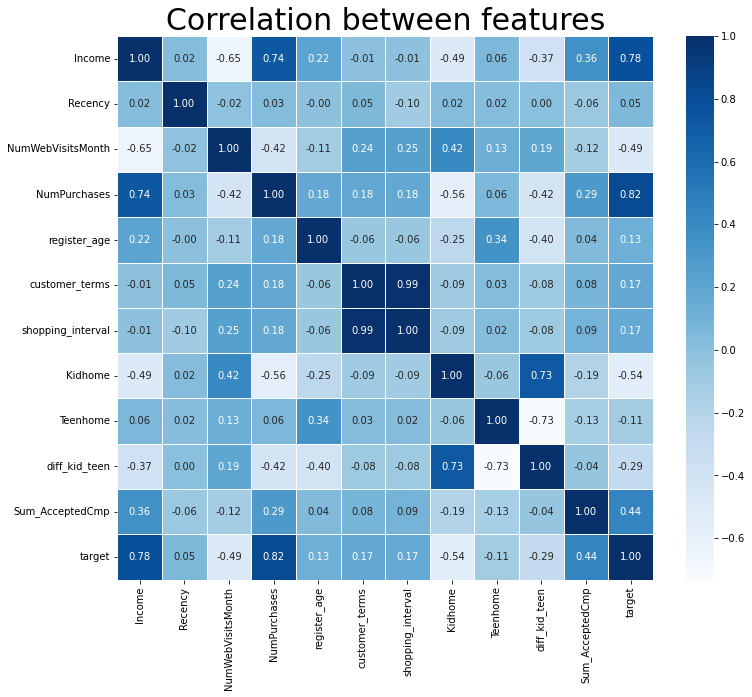

In [28]:
if 'target' not in num_features:
    num_features.append('target')

# 수치형 데이터 상관관계 히트맵 시각화
train_corr = train[num_features]
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

In [29]:
print('train features', len(train.columns))
print(' '.join(list(train.columns)))
print()
print('test features', len(test.columns))
print(' '.join(list(test.columns)))

train features 29
id Year_Birth Education Marital_Status Income Kidhome Teenhome Dt_Customer Recency NumDealsPurchases NumWebPurchases NumCatalogPurchases NumStorePurchases NumWebVisitsMonth AcceptedCmp3 AcceptedCmp4 AcceptedCmp5 AcceptedCmp1 AcceptedCmp2 Complain Response target register_year register_age customer_terms shopping_interval Sum_AcceptedCmp diff_kid_teen NumPurchases

test features 28
id Year_Birth Education Marital_Status Income Kidhome Teenhome Dt_Customer Recency NumDealsPurchases NumWebPurchases NumCatalogPurchases NumStorePurchases NumWebVisitsMonth AcceptedCmp3 AcceptedCmp4 AcceptedCmp5 AcceptedCmp1 AcceptedCmp2 Complain Response register_year register_age customer_terms shopping_interval Sum_AcceptedCmp diff_kid_teen NumPurchases


In [30]:
train.to_csv(f'{path}/train_0504.csv', index = False)
test.to_csv(f'{path}/test_0504.csv', index = False)